In [1]:
#QUENTIN_GROSHENS_2017#

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [65]:
%matplotlib inline

In [4]:
#first_exercice: counting lines#

In [5]:
def number_lines(filename,N_chunk=10000):
    chunks=pd.read_csv(filename,sep='^',chunksize=N_chunk) #cutting file in chuncks to stay in memory
    n_lines=0
    for chunk in chunks:
        n_lines=n_lines+chunk.shape[0]
    return n_lines

In [6]:
number_lines("searches.csv")

20390198

In [7]:
number_lines("bookings.csv")

10000010

In [8]:
#second_exercice: top arrival airports#

In [18]:
#test with 10 bookings#

In [19]:
booking_df=pd.read_csv("bookings.csv",sep='^',nrows=10)

In [20]:
arr_df=booking_df[['arr_port','pax']]

In [21]:
arr_count=arr_df.groupby('arr_port').aggregate(sum)

In [22]:
arr_count.sort_values(by='pax',ascending=False )

,pax
arr_port,
SIN,6
CLT,2
LGA,2
SVO,2
LHR,-1


In [23]:
#test with 2 small chunk#

In [24]:
chunks=pd.read_csv("bookings.csv",sep='^',chunksize=10,nrows=20) #cutting file in chuncks to stay in memory


In [26]:
arr_count=pd.DataFrame()

In [27]:
for chunk in chunks:
    local_arr_count=chunk[['arr_port','pax']]
    local_arr_count=local_arr_count.dropna(axis=0, how='any')
    local_arr_count=local_arr_count.groupby('arr_port').aggregate(sum)
    arr_count=arr_count.add(local_arr_count,fill_value=0).astype(int)


In [28]:
arr_count

,pax
arr_port,
CLT,2
LGA,2
LHR,-1
SIN,4
SVO,2
TUS,1


In [29]:
#with the real data#

In [30]:
chunks=pd.read_csv("bookings.csv",sep='^',chunksize=10000) #cutting file in chuncks to stay in memory


In [31]:
arr_count=pd.DataFrame()#initialize count

In [32]:
for chunk in chunks:
    local_arr_count=chunk[['arr_port','pax']]
    local_arr_count=local_arr_count.dropna(axis=0, how='any')#drop rows with Nans
    local_arr_count=local_arr_count.groupby('arr_port').aggregate(sum)#sum by arrival airport
    arr_count=arr_count.add(local_arr_count,fill_value=0).astype(int)

In [33]:
arr_count.sort_values(by='pax',ascending=False )[:10]

,pax
arr_port,
LHR,88809
MCO,70930
LAX,70530
LAS,69630
JFK,66270
CDG,64490
BKK,59460
MIA,58150
SFO,58000


In [2]:
#preparation test for exercice 3#

In [60]:
search_df=pd.read_csv("searches.csv",sep='^',nrows=100000)

In [93]:
months_string=['January','February','March','April','May','June','July','August','September','October','November','December']


In [70]:
def date2month(date):
    #input string as a date eg: 'yyyy-mm-dd'
    #output string as a month eg: 'March'
    months_string=['January','February','March','April','May','June','July','August','September','October','November','December']
    month=int(date.split('-')[1])-1 #january=0 ect#
    return months_string[month]

In [71]:
date_df=search_df[search_df['Destination']== "AGP"]['Date'].apply(date2month)

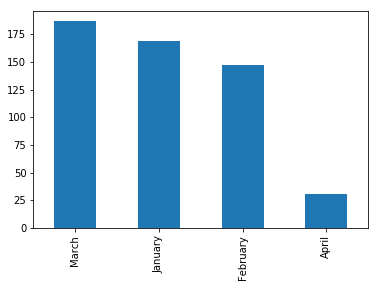

In [72]:
date_df.value_counts().plot(kind='bar')

In [107]:
monthly_search=pd.DataFrame(np.zeros((12,1),dtype=int),columns=['AGP'],index=months_string)

In [88]:
monthly_search=monthly_search.add(ms)

df=date_df.value_counts()

In [116]:
df.keys().values

array(['March', 'January', 'February', 'April'], dtype=object)

In [117]:
ms=pd.DataFrame(df.values,df.keys().values,columns=['AGP'])

In [118]:
ms

,AGP
March,187
January,169
February,147
April,31


In [121]:
monthly_search.add(ms,fill_value=0).astype(int)

,AGP
April,31
August,0
December,0
February,147
January,169
July,0
June,0
March,187
May,0
November,0


In [125]:
#third exercice: monthly destination searches#
#first one destination at a time#

In [149]:
months_string=['January','February','March','April','May','June','July','August','September','October','November','December']


In [150]:
def date2month(date):
    #input string as a date eg: 'yyyy-mm-dd'
    #output string as a month eg: 'March'
    month=int(date.split('-')[1])-1 #january=0 ect#
    return months_string[month]

In [166]:
def monthlySearches(destination):
    monthly_search=pd.DataFrame(np.zeros((12,1),dtype=int),columns=[destination],index=months_string)  
    chunks=pd.read_csv("searches.csv",sep='^',chunksize=10000)
    for chunk in chunks:
        date_df=chunk[chunk['Destination']== destination]['Date'].apply(date2month)
        local_monthly=date_df.value_counts()
        monthly_search=monthly_search.add(pd.DataFrame(local_monthly.values,local_monthly.keys().values,columns=[destination]),fill_value=0).astype(int)
    monthly_search.index=pd.CategoricalIndex(months_string,categories=months_string,sorted=True)  
    return monthly_search.sort_index()

In [167]:
msAGP=monthlySearches('AGP')


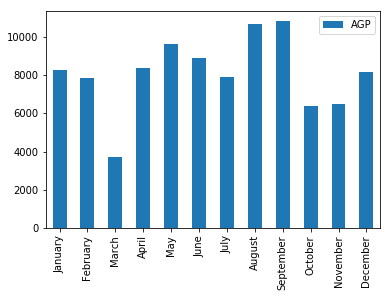

In [169]:
msAGP.plot(kind='bar')

In [170]:
msMAD=monthlySearches('MAD')


In [171]:
msBCN=monthlySearches('BCN')

In [172]:
msMAD


,MAD
January,25251
February,21831
March,14504
April,22800
May,24258
June,22971
July,22800
August,24681
September,26334
October,20272


In [173]:
msBCN

,BCN
January,31236
February,27075
March,15400
April,28329
May,29469
June,29241
July,26505
August,30552
September,28728
October,19824


In [177]:
msTotal=pd.concat([msAGP,msMAD,msBCN],axis=1)

In [178]:
msTotal

,AGP,MAD,BCN
January,8265,25251,31236
February,7866,21831,27075
March,3696,14504,15400
April,8379,22800,28329
May,9633,24258,29469
June,8892,22971,29241
July,7923,22800,26505
August,10659,24681,30552
September,10830,26334,28728
October,6384,20272,19824


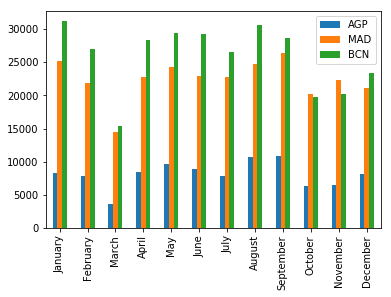

In [179]:
msTotal.plot(kind='bar')
